# Trying Out Network X

In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import matplotlib.pyplot as plt
import pymongo
%matplotlib inline


In [2]:
G = nx.DiGraph()


In [3]:
#G.add_nodes_from(['a','b','c','d','e','f'], name= 'a')

#get Data
db_client = pymongo.MongoClient("localhost", 27017)
db = db_client.CheetSheet

cursor = db.Person.find()
node_list = []
for n in cursor:
    node_list.append(n['name'])
    

G.add_nodes_from(node_list)

In [4]:
cursor2 = db.Relation.find()


for rel in cursor2:
    a = None
    b = None
    
    cursor3 = db.Person.find({'cell_no':rel['p_cell_no'][0]})
    cursor4 = db.Person.find({'cell_no':rel['p_cell_no'][1]})
    
    for p in cursor3:
        a = p
    for c in cursor4:
        b = c
        
    G.add_edges_from([(b['name'],a['name'])])
    print(a['name'],':',a['cell_no'], b['name'], ':',b['cell_no'])
   
    
nx.info(G)

Abuti : 1 Bosele : 2
Lebohang : 3 Lerato : 4
Abuti : 1 Lerato : 4
Lebohang : 3 Bosele : 2
Lebohang : 3 Mathuto : 5
Lerato : 4 Mathuto : 5
Bosele : 2 Lerato : 4
Mathuto : 5 Abuti : 1
Sthabi : 6 Monica : 7
Monica : 7 Gladys : 8
Bosele : 2 Gladys : 8
Sthabi : 6 Bosele : 2
Lebohang : 3 Gladys : 8
Monica : 7 Mathuto : 5
Sthabi : 6 Lerato : 4
Sthabi : 6 Gladys : 8
Abuti : 1 Monica : 7
Motshidisi : 0782323123 Eoch : 0782323234
 :   : 
Khati : 078232313 lerato : 0782323233
Khati : 078232313 Sthabi : 6
Ratla : 082923001 Salome : 082923002


'Name: \nType: DiGraph\nNumber of nodes: 15\nNumber of edges: 22\nAverage in degree:   1.4667\nAverage out degree:   1.4667'

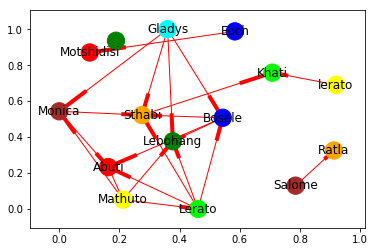

In [7]:

nx.draw_networkx(G,node_color = ['red','blue','green','lime','yellow','orange','brown','cyan'],
                 edge_color = 'red',label_color ='b',with_labels = True,node_size = 300)
